In [1]:
import os
import numpy as np

def get_subdirectories(parent_directory):
    """주어진 디렉토리 내의 모든 하위 디렉토리의 경로를 리스트로 반환합니다."""
    subdirectories = [os.path.join(parent_directory, d) for d in os.listdir(parent_directory) 
                      if os.path.isdir(os.path.join(parent_directory, d))]
    return subdirectories

def get_all_subdirectories(parent_directory):
    """주어진 디렉토리 내의 첫 번째 및 두 번째 레벨 하위 디렉토리의 경로를 NumPy ndarray로 반환합니다."""
    first_level_subdirs = get_subdirectories(parent_directory)
    all_subdirs = []

    for subdir in first_level_subdirs:
        second_level_subdirs = get_subdirectories(subdir)
        all_subdirs.extend(second_level_subdirs)  # 두 번째 레벨의 디렉토리를 추가

    return np.array(all_subdirs)

category_list = get_subdirectories(os.path.join(os.getcwd(),"Dataset/Train/Image"))
all_list = get_all_subdirectories(os.path.join(os.getcwd(),"Dataset/Train/Image"))
print(all_list)

['/Users/seungwoo/Workspace/Causal_Inference/Dataset/Train/Image/Organization/066595'
 '/Users/seungwoo/Workspace/Causal_Inference/Dataset/Train/Image/Organization/107272'
 '/Users/seungwoo/Workspace/Causal_Inference/Dataset/Train/Image/Organization/116132'
 ...
 '/Users/seungwoo/Workspace/Causal_Inference/Dataset/Train/Image/Cutting/086556'
 '/Users/seungwoo/Workspace/Causal_Inference/Dataset/Train/Image/Cutting/113609'
 '/Users/seungwoo/Workspace/Causal_Inference/Dataset/Train/Image/Cutting/079350']


In [2]:
from Dataset import *
from torchvision import transforms

test_transform = transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.ToTensor(),
        transforms.Normalize([0.7760, 0.7491, 0.7213], [0.2949, 0.3032, 0.3314]),
    ]
)
# For training, we add some augmentation. Networks are too powerful and would overfit.
train_transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.RandomHorizontalFlip(),
        # transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize([0.7760, 0.7491, 0.7213], [0.2949, 0.3032, 0.3314]),
    ]
)

dir = os.path.join(os.getcwd(),"Dataset/Train/Image")
train_dataset = QADataset(transform=train_transform, loc = dir)
print(len(train_dataset))
val_dataset = QADataset(transform = test_transform, loc = dir, istrain =  False)
print(len(val_dataset))

/Users/seungwoo/anaconda3/envs/transformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


48000
6000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images stack shape: torch.Size([16, 4, 3, 128, 128])
Images stack Type : <class 'torch.Tensor'>
Correct answer group IDs: tensor([[3],
        [1],
        [2],
        [1],
        [3],
        [2],
        [1],
        [1],
        [2],
        [1],
        [1],
        [1],
        [3],
        [2],
        [2],
        [2]])
Correct answer group IDs Type: <class 'torch.Tensor'>
Category names: ('Pollution', 'Extraction', 'Cutting', 'Processing', 'Achievement', 'Extraction', 'Pollution', 'Pollution', 'Damage', 'Growth', 'Organization', 'Achievement', 'Consumption', 'Processing', 'Extraction', 'Processing')


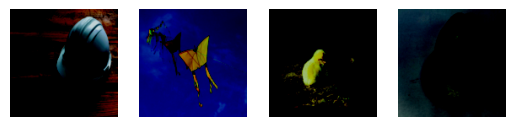

In [4]:
from torch.utils.data import DataLoader
# DataLoader 설정
data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # 배치 크기를 4로 설정

# 첫 번째 배치 추출
first_batch = next(iter(data_loader))

# 배치 내용 확인
images_stack, correct_answer_group_ids, category_names = first_batch

print("Images stack shape:", images_stack.shape)  # 이미지 스택의 형태
print("Images stack Type :", type(images_stack))  # 이미지 스택의 자료형
print("Correct answer group IDs:", correct_answer_group_ids)  # 정답 그룹 ID
print("Correct answer group IDs Type:", type(correct_answer_group_ids))  # 정답 그룹 ID
print("Category names:", category_names)  # 카테고리 이름

# 이미지 시각화 (선택적)
import matplotlib.pyplot as plt

# 첫 번째 배치의 첫 번째 이미지 스택 시각화
for i in range(images_stack.shape[1]):  # 이미지 스택 내의 각 이미지에 대해
    plt.subplot(1, images_stack.shape[1], i + 1)
    plt.imshow(images_stack[0, i].permute(1, 2, 0))  # 채널 차원을 맨 뒤로 이동
    plt.axis('off')
plt.show()
